# Numpy

`Numpy` 提供高效多维数组对象, 是Python科学计算的核心.

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, Video
np.random.seed(123)

## 数组创建

### 从列表创建

In [2]:
a = np.array([[1,2,3], [4, 5, 6]])
b = np.array([1, 2, 3])

In [3]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [4]:
b

array([1, 2, 3])

In [5]:
print("a:", a.shape, a.size, type(a), np.rank(a))
print("b:", b.shape, b.size, type(b), np.rank(b))

a: (2, 3) 6 <class 'numpy.ndarray'> 2
b: (3,) 3 <class 'numpy.ndarray'> 1


### 使用`Numpy`函数创建

In [6]:
np.zeros((2,2))  # Create an array of all zeros

array([[ 0.,  0.],
       [ 0.,  0.]])

In [7]:
np.ones((1,2))   # Create an array of all ones

array([[ 1.,  1.]])

In [8]:
np.full((2,2), 7) # Create a constant array

array([[7, 7],
       [7, 7]])

In [9]:
np.eye(2)        # Create a 2x2 identity matrix

array([[ 1.,  0.],
       [ 0.,  1.]])

In [10]:
np.random.random((2,2)) # Create an array filled with random values

array([[ 0.69646919,  0.28613933],
       [ 0.22685145,  0.55131477]])

In [11]:
np.arange(9).reshape(3,-1)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [12]:
np.tril(np.arange(9).reshape(3,-1)) # np.triu

array([[0, 0, 0],
       [3, 4, 0],
       [6, 7, 8]])

### 从文件读取

In [13]:
!head test.dat
!wc test.dat

# show how to save array dat.
#  a simple example
5.819602537672219356e-01,5.087776563724527579e-01,2.784142127232769326e-03,5.957311390647657134e-01,8.689860709925093518e-01
9.264195805336176148e-01,7.800147882622944229e-01,9.676056206751270095e-01,2.205256712547208897e-01,2.061922083494628355e-01
6.783337181089943435e-01,5.869145106077806595e-01,2.952358654499552815e-01,3.801997771883158794e-01,6.889636599796673533e-01
4.292230072013289988e-01,4.257627535426546928e-01,7.021841592214385086e-01,8.686417248472499963e-02,3.583006283237899492e-02
5.263115697205873467e-01,8.799444420949060763e-01,1.194754090830576487e-01,7.479153109619839368e-01,9.440646400270436001e-02
1.232809121329454527e-01,5.186331522192256793e-01,9.809687646542244455e-01,8.783019711016459841e-02,3.133205853162499555e-01
7.516376862486182642e-01,8.785274617838342293e-01,8.784804332149217521e-01,8.749962343094666029e-01,4.158675577860713179e-01
1.320108327988774866e-01,5.535512918624858614e-01,7.234839929208859433e-01,

In [14]:
a = np.genfromtxt("test.dat", delimiter=",")

In [15]:
a[:10], a.shape

(array([[ 0.58196025,  0.50877766,  0.00278414,  0.59573114,  0.86898607],
        [ 0.92641958,  0.78001479,  0.96760562,  0.22052567,  0.20619221],
        [ 0.67833372,  0.58691451,  0.29523587,  0.38019978,  0.68896366],
        [ 0.42922301,  0.42576275,  0.70218416,  0.08686417,  0.03583006],
        [ 0.52631157,  0.87994444,  0.11947541,  0.74791531,  0.09440646],
        [ 0.12328091,  0.51863315,  0.98096876,  0.0878302 ,  0.31332059],
        [ 0.75163769,  0.87852746,  0.87848043,  0.87499623,  0.41586756],
        [ 0.13201083,  0.55355129,  0.72348399,  0.85806558,  0.26249202],
        [ 0.6851118 ,  0.09952834,  0.14369892,  0.94161568,  0.25347245],
        [ 0.30776681,  0.38581678,  0.20300198,  0.88743555,  0.44905365]]),
 (1000, 5))

In [16]:
# 保存数组到可读文件
np.savetxt("test.dat", np.random.random((1000, 5)), delimiter=",", header="show how to save array dat.\n a simple example")

# 保存二进制文件
np.savetxt("test.npy", np.random.random((1000, 5)))

In [79]:
# 读取大文件
def generate_text_file(length=1e6, ncols=20):
    data = np.random.random((int(length), int(ncols)))
    np.savetxt('large_text_file.csv', data, delimiter=',')

def iter_loadtxt(filename, delimiter=',', skiprows=0, dtype=float):
    def iter_func():
        with open(filename, 'r') as infile:
            for _ in range(skiprows):
                next(infile)
            for line in infile:
                line = line.rstrip().split(delimiter)
                for item in line:
                    yield dtype(item)
        iter_loadtxt.rowlength = len(line)

    data = np.fromiter(iter_func(), dtype=dtype)
    data = data.reshape((-1, iter_loadtxt.rowlength))
    return data

In [81]:
# generate_text_file() # 477M

In [91]:
%time data = np.genfromtxt('large_text_file.csv', delimiter=",")

CPU times: user 25.8 s, sys: 1.4 s, total: 27.2 s
Wall time: 27.2 s


In [90]:
%time data = iter_loadtxt('large_text_file.csv')

CPU times: user 11.5 s, sys: 364 ms, total: 11.9 s
Wall time: 11.9 s


In [93]:
%time data = pd.read_csv('large_text_file.csv')

CPU times: user 5.52 s, sys: 473 ms, total: 6 s
Wall time: 5.76 s


## 数组索引

[Numpy index](https://docs.scipy.org/doc/numpy/user/basics.indexing.html)

In [17]:
a = np.arange(12).reshape(4, -1)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

### 直接索引

In [18]:
print(a[0, 0], a[1, 2], a[2, 2])

0 5 8


In [19]:
a[0, 2] = 3

### 切片索引

In [20]:
a[:, 0], a[1, :], a[[1], :]

(array([0, 3, 6, 9]), array([3, 4, 5]), array([[3, 4, 5]]))

In [21]:
a[:, 0] = 4

In [22]:
a

array([[ 4,  1,  3],
       [ 4,  4,  5],
       [ 4,  7,  8],
       [ 4, 10, 11]])

### 整数数组索引

In [23]:
a = np.arange(12).reshape(4, -1)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [24]:
a[[1, 3], :] 

array([[ 3,  4,  5],
       [ 9, 10, 11]])

In [25]:
a[[1, 3], :] = 5

In [26]:
a

array([[0, 1, 2],
       [5, 5, 5],
       [6, 7, 8],
       [5, 5, 5]])

### 条件索引

In [27]:
a = np.random.random(10)*2 + -1 # random with(-1, 1)
a

array([-0.64881796, -0.77467908,  0.35521797,  0.91105154,  0.928105  ,
       -0.29407944, -0.26682051,  0.09194861, -0.0057042 , -0.63097308])

In [28]:
a[a>0.3]

array([ 0.35521797,  0.91105154,  0.928105  ])

In [29]:
a>0.3, a

(array([False, False,  True,  True,  True, False, False, False, False, False], dtype=bool),
 array([-0.64881796, -0.77467908,  0.35521797,  0.91105154,  0.928105  ,
        -0.29407944, -0.26682051,  0.09194861, -0.0057042 , -0.63097308]))

In [30]:
np.where(a>0.3)

(array([2, 3, 4]),)

In [31]:
np.where((a > 0.3) & (np.sin(a) > 0.6 ))

(array([3, 4]),)

In [32]:
a[np.where((a > 0.3) & (np.sin(a) > 0.6 ))]

array([ 0.91105154,  0.928105  ])

## 数据类型

[numpy datatypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

In [33]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


In [34]:
x1 = x + 0.3
print(x1, x1.dtype)

[ 1.3  2.3] float64


In [35]:
z[0] = 3.5
z

array([3, 2])

## 数组操作

[Numpy functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

### 数学操作

In [36]:
x = np.random.random((3,3))
y = np.random.random((3,3))

print(x,'\n\n', y)

[[ 0.90837483  0.04621222  0.149207  ]
 [ 0.09195376  0.1260362   0.47466339]
 [ 0.10981445  0.14371574  0.30696156]] 

 [[ 0.54390228  0.7349922   0.77652429]
 [ 0.3960191   0.06627944  0.26578009]
 [ 0.12472825  0.75619674  0.82805723]]


In [37]:
x+y, x*y, x/y, x-y

(array([[ 1.45227711,  0.78120442,  0.92573129],
        [ 0.48797286,  0.19231564,  0.74044348],
        [ 0.23454271,  0.89991248,  1.13501879]]),
 array([[ 0.49406714,  0.03396562,  0.11586286],
        [ 0.03641545,  0.00835361,  0.12615608],
        [ 0.01369696,  0.10867737,  0.25418174]]),
 array([[ 1.67010666,  0.06287444,  0.19214724],
        [ 0.23219528,  1.9015881 ,  1.78592528],
        [ 0.88042965,  0.19005072,  0.3707009 ]]),
 array([[ 0.36447254, -0.68877998, -0.62731729],
        [-0.30406533,  0.05975675,  0.20888329],
        [-0.0149138 , -0.61248101, -0.52109567]]))

In [38]:
np.sin(x), np.sqrt(y)

(array([[ 0.78850525,  0.04619578,  0.14865399],
        [ 0.09182423,  0.12570278,  0.45703907],
        [ 0.10959387,  0.14322153,  0.30216362]]),
 array([[ 0.73749731,  0.85731686,  0.88120616],
        [ 0.62930048,  0.25744794,  0.51553864],
        [ 0.35316887,  0.86959574,  0.9099765 ]]))

In [39]:
x@y, x.dot(y)  # 矩阵乘法, x.dot(y) in Py2

(array([[ 0.5309784 ,  0.78354118,  0.84120934],
        [ 0.15913054,  0.43487781,  0.49795069],
        [ 0.15492929,  0.3223615 ,  0.37765211]]),
 array([[ 0.5309784 ,  0.78354118,  0.84120934],
        [ 0.15913054,  0.43487781,  0.49795069],
        [ 0.15492929,  0.3223615 ,  0.37765211]]))

In [40]:
x.T, x.T.T # 转置

(array([[ 0.90837483,  0.09195376,  0.10981445],
        [ 0.04621222,  0.1260362 ,  0.14371574],
        [ 0.149207  ,  0.47466339,  0.30696156]]),
 array([[ 0.90837483,  0.04621222,  0.149207  ],
        [ 0.09195376,  0.1260362 ,  0.47466339],
        [ 0.10981445,  0.14371574,  0.30696156]]))

In [41]:
z = np.random.random((5,3))
z

array([[ 0.90080705,  0.87439356,  0.29625619],
       [ 0.49912016,  0.5490851 ,  0.7243249 ],
       [ 0.76964773,  0.43816602,  0.28422741],
       [ 0.27327404,  0.54952455,  0.75035437],
       [ 0.97611748,  0.57371176,  0.20624832]])

In [42]:
np.max(z), np.max(z, axis=0), np.max(z, axis=1)

(0.97611748011151767,
 array([ 0.97611748,  0.87439356,  0.75035437]),
 array([ 0.90080705,  0.7243249 ,  0.76964773,  0.75035437,  0.97611748]))

In [43]:
np.sum(z), np.sum(z, axis=0), np.sum(z, axis=1)

(8.6652586320411835,
 array([ 3.41896646,  2.98488098,  2.26141119]),
 array([ 2.0714568 ,  1.77253016,  1.49204116,  1.57315296,  1.75607757]))

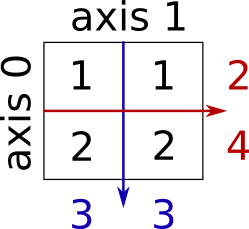

In [102]:
Image(filename='reductions.png', width=300) 

### Broadcasting(广播)

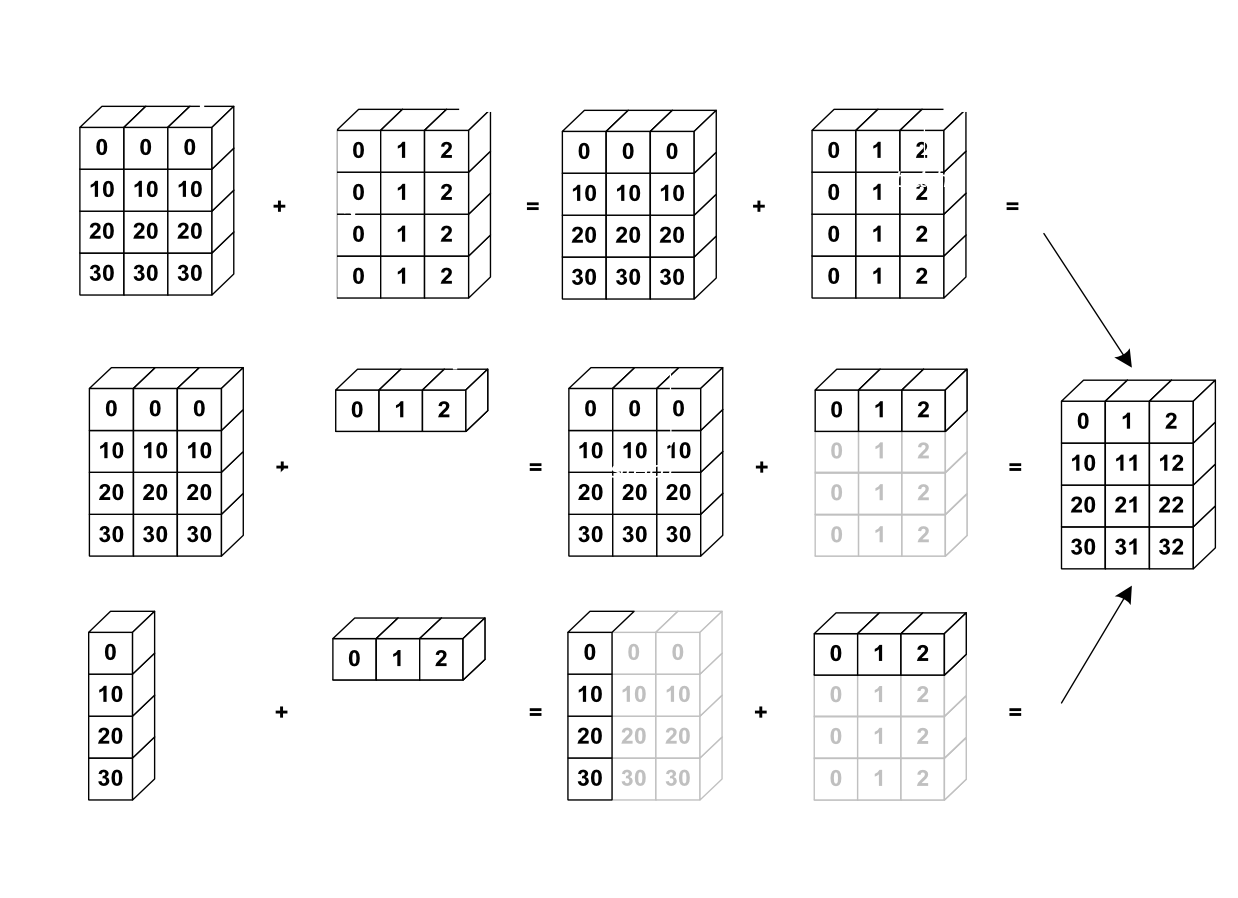

In [103]:
Image(filename='numpy_broadcasting.png', width=800) 

In [44]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
b = np.array([0, 1, 2])
c = np.empty_like(a)   

for i in range(a.shape[0]):
    c[i, :] = a[i, :] + b

print(a, "\n\n", c)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [45]:
b1 = np.tile(b, (a.shape[0], 1))
c = a + b1
print(a, "\n\n", a + b)


[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [46]:
np.tile(b, (a.shape[0], 3))

array([[0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2, 0, 1, 2]])

In [47]:
c = a+b
print(a, "\n\n", c)

[[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [48]:
a = np.arange(0, 40, 10)
a = a.reshape(4, 1)
# a = a[:, np.newaxis]  # adds a new axis -> 2D array

b = np.array([0, 1, 2])
c = a+b

print(a, "\n\n", b,"\n\n", c)

[[ 0]
 [10]
 [20]
 [30]] 

 [0 1 2] 

 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


In [49]:
a * b # universal function: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs

array([[ 0,  0,  0],
       [ 0, 10, 20],
       [ 0, 20, 40],
       [ 0, 30, 60]])

### 数组形状操作

In [50]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [51]:
print(a.ravel(), "\n\n", a.flatten())

[1 2 3 4 5 6] 

 [1 2 3 4 5 6]


In [52]:
a.flatten?

Docstring:
a.flatten(order='C')

Return a copy of the array collapsed into one dimension.

Parameters
----------
order : {'C', 'F', 'A', 'K'}, optional
    'C' means to flatten in row-major (C-style) order.
    'F' means to flatten in column-major (Fortran-
    style) order. 'A' means to flatten in column-major
    order if `a` is Fortran *contiguous* in memory,
    row-major order otherwise. 'K' means to flatten
    `a` in the order the elements occur in memory.
    The default is 'C'.

Returns
-------
y : ndarray
    A copy of the input array, flattened to one dimension.

See Also
--------
ravel : Return a flattened array.
flat : A 1-D flat iterator over the array.

Examples
--------
>>> a = np.array([[1,2], [3,4]])
>>> a.flatten()
array([1, 2, 3, 4])
>>> a.flatten('F')
array([1, 3, 2, 4])
Type:      builtin_function_or_method


In [53]:
a.reshape(-1)

array([1, 2, 3, 4, 5, 6])

In [54]:
a.reshape(2, -1)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [55]:
a.reshape(2, 3)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [56]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

In [57]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [58]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

In [59]:
np.append??

Signature: np.append(arr, values, axis=None)
Source:   
def append(arr, values, axis=None):
    """
    Append values to the end of an array.

    Parameters
    ----------
    arr : array_like
        Values are appended to a copy of this array.
    values : array_like
        These values are appended to a copy of `arr`.  It must be of the
        correct shape (the same shape as `arr`, excluding `axis`).  If
        `axis` is not specified, `values` can be any shape and will be
        flattened before use.
    axis : int, optional
        The axis along which `values` are appended.  If `axis` is not
        given, both `arr` and `values` are flattened before use.

    Returns
    -------
    append : ndarray
        A copy of `arr` with `values` appended to `axis`.  Note that
        `append` does not occur in-place: a new array is allocated and
        filled.  If `axis` is None, `out` is a flattened array.

    See Also
    --------
    insert : Insert elements into an array.
   

## 例子

### 分段函数

### 随机行走

### 康威生命游戏

1. 当前细胞为存活状态时，当周围低于2个（不包含2个）存活细胞时， 该细胞变成死亡状态。（模拟生命数量稀少）
1. 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
1. 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）
1. 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）

Ref:

康威生命游戏: [中文](https://zh.wikipedia.org/wiki/%E5%BA%B7%E5%A8%81%E7%94%9F%E5%91%BD%E6%B8%B8%E6%88%8F), [英文](https://en.wikipedia.org/wiki/The_Game_of_Life)

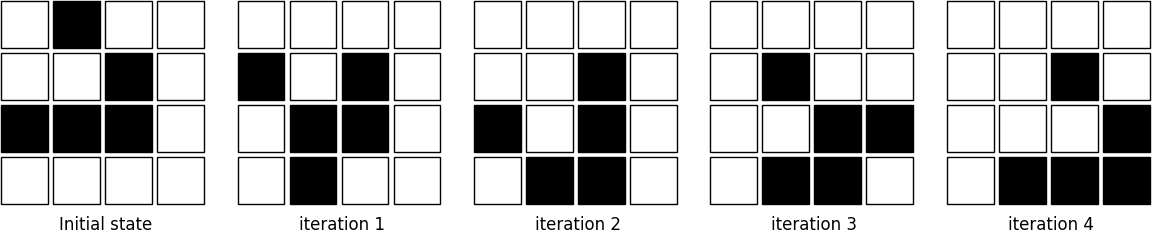

In [110]:
Image(filename='glider.png', width=800) 

#### Python 实现

In [60]:
def compute_neighbours(Z):
    shape = len(Z), len(Z[0])
    N  = [[0,]*(shape[0]) for i in range(shape[1])]
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y]            +Z[x+1][y]   \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

In [61]:
def iterate(Z):
    N = compute_neighbours(Z)
    shape = len(Z), len(Z[0])
    for x in range(1,shape[0]-1):
        for y in range(1,shape[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [62]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

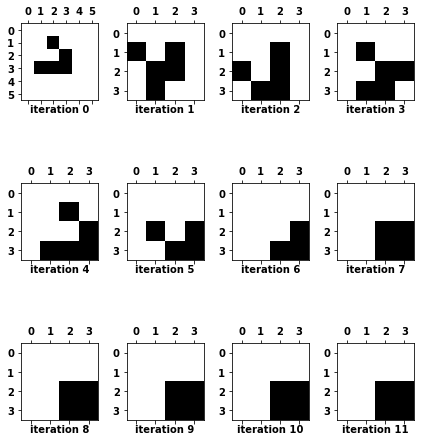

In [63]:
fig, axes = plt.subplots(3, 4, figsize=(6, 8))

axes = axes.flatten()

axes[0].matshow(Z, cmap="Greys")
axes[0].set_xlabel("iteration %s" % 0)

for i in range(1,12):
    Z = iterate(Z)
    axes[i].matshow(np.array(Z)[1:-1, 1:-1], cmap="Greys")
    axes[i].set_xlabel("iteration %s" % i)

#### Numpy 实现 1

In [64]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1

In [65]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

In [66]:
N

array([[0, 0, 0, 0, 0, 0],
       [0, 1, 1, 2, 1, 0],
       [0, 3, 5, 3, 2, 0],
       [0, 1, 3, 2, 2, 0],
       [0, 2, 3, 2, 1, 0],
       [0, 0, 0, 0, 0, 0]])

In [67]:
# Flatten arrays
N_ = N.ravel()
Z_ = Z.ravel()

# Apply rules
# 当前细胞为存活状态时，当周围低于2个（不包含2个）存活细胞时， 该细胞变成死亡状态。（模拟生命数量稀少）
R1 = np.argwhere( (Z_==1) & (N_ < 2) )
# 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
R2 = np.argwhere( (Z_==1) & (N_ > 3) )
# 当前细胞为存活状态时，当周围有3个以上的存活细胞时，该细胞变成死亡状态。（模拟生命数量过多）
R3 = np.argwhere( (Z_==1) & ((N_==2) | (N_==3)) )
# 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）
R4 = np.argwhere( (Z_==0) & (N_==3) )

# Set new values
Z_[R1] = 0
Z_[R2] = 0
Z_[R3] = Z_[R3]
Z_[R4] = 1

# Make sure borders stay null
Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0

In [68]:
Z

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

#### Numpy 实现 2

In [69]:
Z = [[0, 1, 0, 0],
    [0, 0, 1, 0],
    [1, 1, 1, 0],
    [0, 0, 0, 0]]

Z1 = np.zeros((6, 6), dtype=int)
Z1[1:-1, 1:-1] = Z

Z = Z1

In [70]:
N = np.zeros(Z.shape, dtype=int)
N[1:-1,1:-1] += (Z[ :-2, :-2] + Z[ :-2,1:-1] + Z[ :-2,2:] +
                 Z[1:-1, :-2]                + Z[1:-1,2:] +
                 Z[2:  , :-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

# 当前细胞为存活状态时，当周围有2个或3个存活细胞时， 该细胞保持原样。
birth = (N==3)[1:-1,1:-1] & (Z[1:-1,1:-1]==0)
# 当前细胞为死亡状态时，当周围有3个存活细胞时，该细胞变成存活状态。 （模拟繁殖）
survive = ((N==2) | (N==3))[1:-1,1:-1] & (Z[1:-1,1:-1]==1)
Z[...] = 0
Z[1:-1,1:-1][birth | survive] = 1

In [109]:
Video("game-of-life.mp4")

## 参考

1. [Scipy Lecture Notes](http://www.scipy-lectures.org/intro/numpy/)
1. [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy)
1. [CS228 Python Tutorial](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb)